In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import datetime
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
#from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV



In [ ]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes


In [ ]:
print(df.info())    #
print(len(df[df.duplicated()]))   #no duplicates
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB
None
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        -------------

#missing values accident ,clean_title,fuel_type

In [ ]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [ ]:
#
#get unique vales of each column
print("engine : " , df['engine'].nunique())  #horse power , engine_size , cylinder
print("int_col : " ,df['int_col'].nunique())
print("ext_col : " ,df['ext_col'].nunique())
print("accident : " ,df['accident'].nunique()) #done
print("transmission : " ,df['transmission'].nunique())
print("fuel_type : " ,df['fuel_type'].nunique())
print("model_year : " ,df['model_year'].nunique())  #done
print("model : " ,df['model'].nunique())
print("brand : " ,df['brand'].nunique())
print("milage : " ,df['milage'].nunique())  #done
print("clean_title : " ,df['clean_title'].nunique())  #done

engine :  1117
int_col :  156
ext_col :  319
accident :  2
transmission :  52
fuel_type :  7
model_year :  34
model :  1897
brand :  57
milage :  6651
clean_title :  1


In [ ]:
#if all the same value then drop
df.drop("clean_title",axis= 1, inplace= True)
test.drop("clean_title",axis= 1, inplace= True)

In [ ]:
df.drop("id",axis= 1, inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  price         188533 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 15.8+ MB


DATA CLEANING

In [ ]:
df['transmission'] = df['transmission'].str.replace('–', 'unknown')
test['transmission'] = test['transmission'].str.replace('–', 'unknown')


In [ ]:
df['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [ ]:
df['fuel_type'] = df['fuel_type'].replace('–', np.nan)
test['fuel_type'] = test['fuel_type'].replace('–', np.nan)

# Check the result
print(df['fuel_type'].isnull().sum())  # to verify the count of NaN values
print(test['fuel_type'].isnull().sum())

5864
3921


In [ ]:
train = df.copy()

In [ ]:
te = test.copy()

In [ ]:
train.isna().sum()

brand              0
model              0
model_year         0
milage             0
fuel_type       5864
engine             0
transmission       0
ext_col            0
int_col            0
accident        2452
price              0
dtype: int64

In [ ]:
#engine
def extract_data_from_engine(df):
    # Extract horsepower (HP) and convert to float
    df['horsepower'] = df['engine'].str.extract(r'(\d+\.\d+)(?=\s*HP)')[0].astype(float)

    # Extract engine size (L) and convert to float
    df['engine_size'] = df['engine'].str.extract(r'(\d+\.\d+)(?=\s*L)')[0].astype(float)

    # Extract number of cylinders and convert to float
    df['cylinders'] = df['engine'].str.extract(r'(\d+)\s*(?:Cylinder|V\d|Straight)')[0].astype(float)

    return df

In [ ]:
train = extract_data_from_engine(train)
te = extract_data_from_engine(te)


In [ ]:
def extract_fuel_type(engine_info):
    if 'gasoline' in engine_info.lower():
        return 'Gasoline'
    elif 'hybrid' in engine_info.lower():
        return 'Hybrid'
    elif 'flex fuel' in engine_info.lower() or 'e85' in engine_info.lower():
        return 'Flex Fuel'
    elif 'diesel' in engine_info.lower():
        return 'Diesel'
    elif 'electric' in engine_info.lower():
        return 'Electric'
    else:
        return np.nan

train['extracted_fuel_type'] = train['engine'].apply(extract_fuel_type)
train['fuel_type'] = train['fuel_type'].fillna(train['extracted_fuel_type'])


In [ ]:
te['extracted_fuel_type'] = te['engine'].apply(extract_fuel_type)
te['fuel_type'] = te['fuel_type'].fillna(train['extracted_fuel_type'])


In [ ]:
train.drop(columns=['extracted_fuel_type'], inplace=True)
train.drop(columns=['engine'], inplace=True)


In [ ]:
te.drop(columns=['extracted_fuel_type'], inplace=True)
te.drop(columns=['engine'], inplace=True)


In [ ]:
train.drop(columns=['model'], inplace=True)
te.drop(columns=['model'], inplace=True)

In [ ]:
train.isna().sum()

brand               0
model_year          0
milage              0
fuel_type         951
transmission        0
ext_col             0
int_col             0
accident         2452
price               0
horsepower      33259
engine_size      6698
cylinders       37855
dtype: int64

In [ ]:
train['fuel_type'] = train['fuel_type'].fillna("unknown")
train.isna().sum()

brand               0
model_year          0
milage              0
fuel_type           0
transmission        0
ext_col             0
int_col             0
accident         2452
price               0
horsepower      33259
engine_size      6698
cylinders       37855
dtype: int64

In [ ]:
te['fuel_type'] = te['fuel_type'].fillna("unknown")


In [ ]:
def less_variaty(x):
    if 'hybrid' in x.lower():
        return 'Hybrid'
    elif 'flex fuel' in x.lower():
        return 'Flex Fuel'
    else:
        return x

train['fuel_type'] = train['fuel_type'].apply(less_variaty)
te['fuel_type'] = te['fuel_type'].apply(less_variaty)



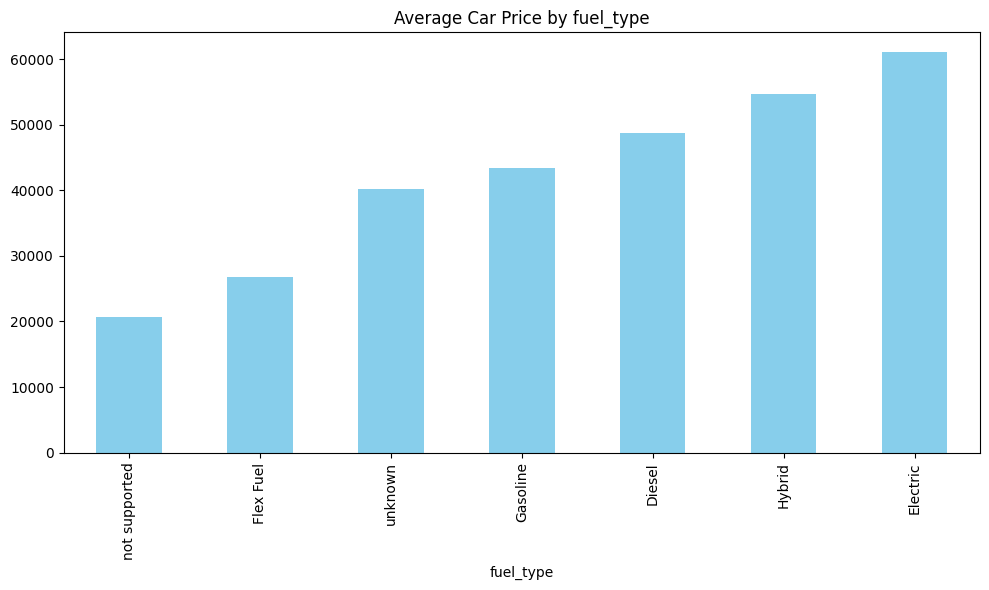

['not supported', 'Flex Fuel', 'unknown', 'Gasoline', 'Diesel', 'Hybrid', 'Electric']


In [ ]:
#brand

# Group by 'brand' and calculate the average price
fuel_type_price = train.groupby('fuel_type')['price'].mean().sort_values(ascending=True)

# Convert the result to a list of sorted brands
sorted_fuel_type = fuel_type_price.index.tolist()

# Visualization: Bar chart of average price by brand
plt.figure(figsize=(10, 6))
fuel_type_price.plot(kind='bar', color='skyblue')
plt.title('Average Car Price by fuel_type')
plt.xlabel('fuel_type')
plt.xticks(rotation=90)  # Rotate brand names for better readability
plt.tight_layout()
plt.show()

# Print sorted brands list
print(sorted_fuel_type)

#label this according to this list


In [ ]:
fuel_to_index = {fuel: index for index, fuel in enumerate(sorted_fuel_type)}

# Replace brand names with their indices
train['fuel_type'] = train['fuel_type'].map(fuel_to_index)

In [ ]:
te['fuel_type'] = te['fuel_type'].map(fuel_to_index)

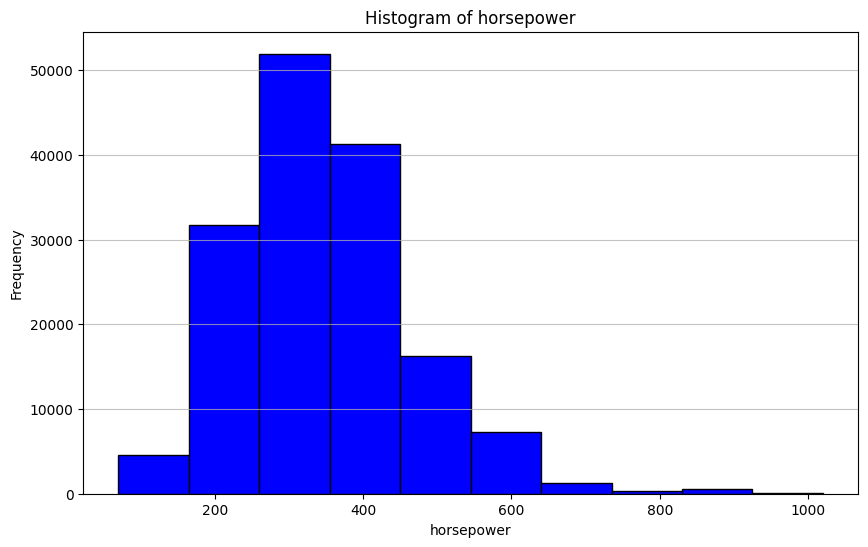

In [ ]:
#handle missing values in totalcharges
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(train['horsepower'], color='blue', edgecolor='black')
plt.title('Histogram of horsepower')
plt.xlabel('horsepower')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

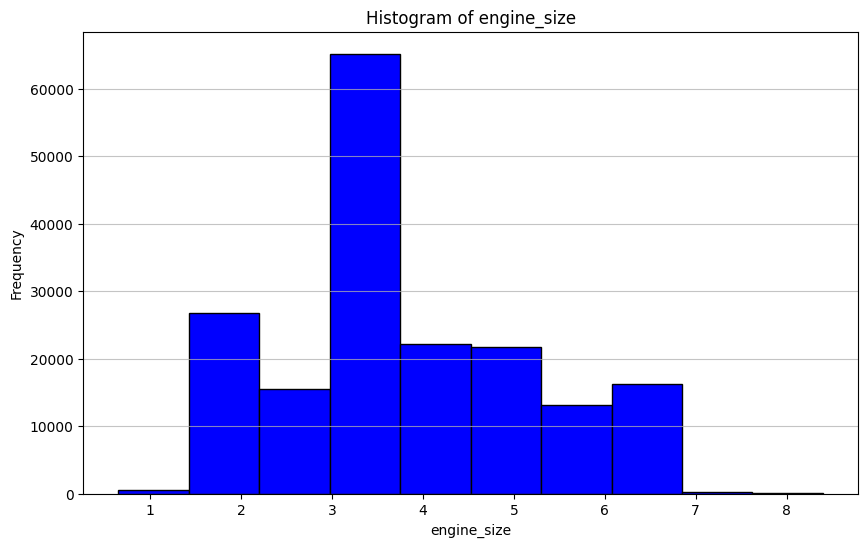

In [ ]:
#handle missing values in totalcharges
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(train['engine_size'], color='blue', edgecolor='black')
plt.title('Histogram of engine_size')
plt.xlabel('engine_size')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

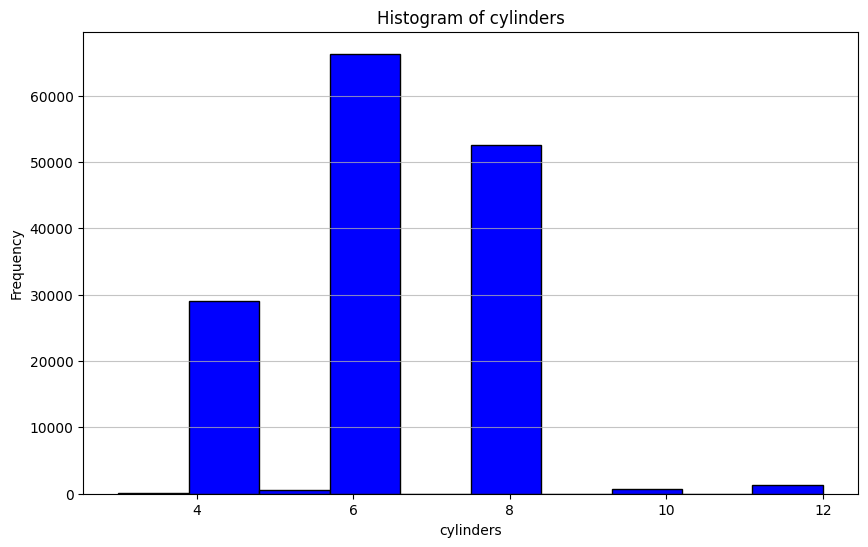

In [ ]:
#handle missing values in totalcharges
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(train['cylinders'], color='blue', edgecolor='black')
plt.title('Histogram of cylinders')
plt.xlabel('cylinders')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

#distribution of cylinders is skewed towards 4, 6, and 8 cylinders --> fill the missing values using the mode
#distribution of engine_size is  concentrated around 3 to 4 liters --> fill with median
#distribution of horsepower is a right-skewed , with most cars having between 200 and 400 horsepower --> fill with median or mean


In [ ]:
mc_train = train['cylinders'].mode()[0]
em_train = train['engine_size'].mean()
hc_train = train['horsepower'].mean()

train['cylinders'].fillna(mc_train, inplace=True)
train['engine_size'].fillna(em_train, inplace=True)
train['horsepower'].fillna(hc_train, inplace=True)


In [ ]:
te['cylinders'].fillna(mc_train, inplace=True)
te['engine_size'].fillna(em_train, inplace=True)
te['horsepower'].fillna(hc_train, inplace=True)

In [ ]:
train.isna().sum()

brand              0
model_year         0
milage             0
fuel_type          0
transmission       0
ext_col            0
int_col            0
accident        2452
price              0
horsepower         0
engine_size        0
cylinders          0
dtype: int64

In [ ]:
#transmission
train['transmission'] = train['transmission'].apply(lambda x: 'automatic' if 'a/t' in x.lower() or 'automatic' in x.lower() else 'manual')
te['transmission'] = te['transmission'].apply(lambda x: 'automatic' if 'a/t' in x.lower() or 'automatic' in x.lower() else 'manual')


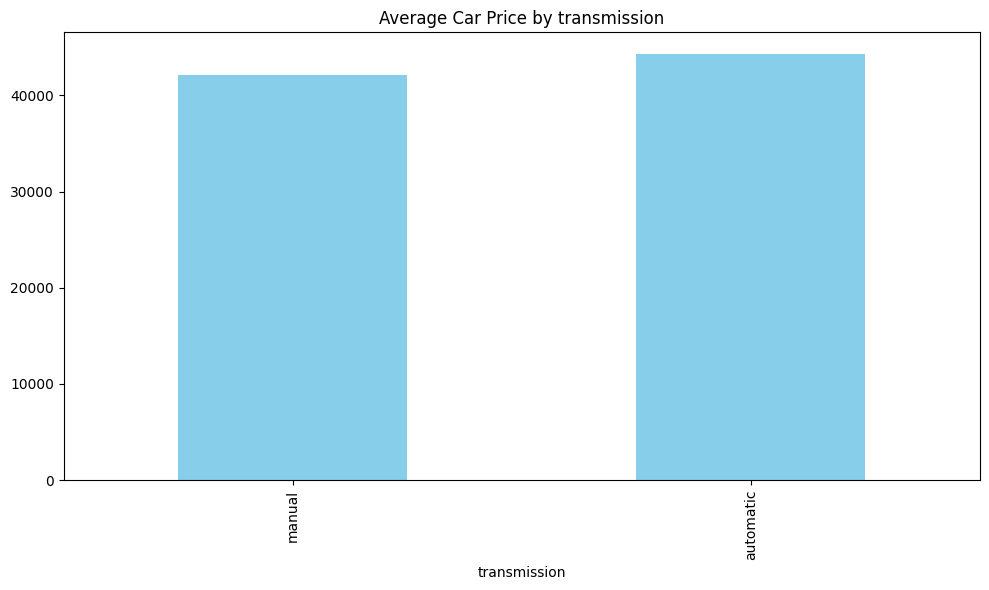

['manual', 'automatic']


In [ ]:
#brand

# Group by 'brand' and calculate the average price
transmission_price = train.groupby('transmission')['price'].mean().sort_values(ascending=True)

# Convert the result to a list of sorted brands
sorted_transmission = transmission_price.index.tolist()

# Visualization: Bar chart of average price by brand
plt.figure(figsize=(10, 6))
transmission_price.plot(kind='bar', color='skyblue')
plt.title('Average Car Price by transmission')
plt.xlabel('transmission')
plt.xticks(rotation=90)  # Rotate brand names for better readability
plt.tight_layout()
plt.show()

# Print sorted brands list
print(sorted_transmission)

#label this according to this list


In [ ]:
#encoding
train['transmission'] = train["transmission"].map({"automatic":1, "manual":0})
te['transmission'] = te["transmission"].map({"automatic":1, "manual":0})


In [ ]:
train['Vehicle_Age'] = 2024 - train['model_year']
te['Vehicle_Age'] = 2024 - te['model_year']

ACCIDENT NULL FILLING USING KNN

In [ ]:
from sklearn.impute import KNNImputer

# Map 'accident' column to binary values
train['accident'] = train["accident"].map({"None reported": 0, "At least 1 accident or damage reported": 1})
te['accident'] = te["accident"].map({"None reported": 0, "At least 1 accident or damage reported": 1})

# Include 'model_year' and 'price' to help in imputing 'accident'
train_features = train[['model_year','transmission','horsepower', 'accident']]

# Initialize KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values
train_imputed = imputer.fit_transform(train_features)

# Extract the imputed 'accident' values (last column of the imputed result)
train['accident'] = train_imputed[:, -1]

# Ensure that no NaN values remain
print("Remaining NaN in 'accident':", train['accident'].isna().sum())

# For the test dataset (assuming the same process for 'te'):
te_features = te[['model_year','transmission','horsepower', 'accident']]
te_imputed = imputer.transform(te_features)
te['accident'] = te_imputed[:, -1]


Remaining NaN in 'accident': 0


In [ ]:
te['accident'].unique()

array([0. , 1. , 0.4, 0.2, 0.6, 0.8])

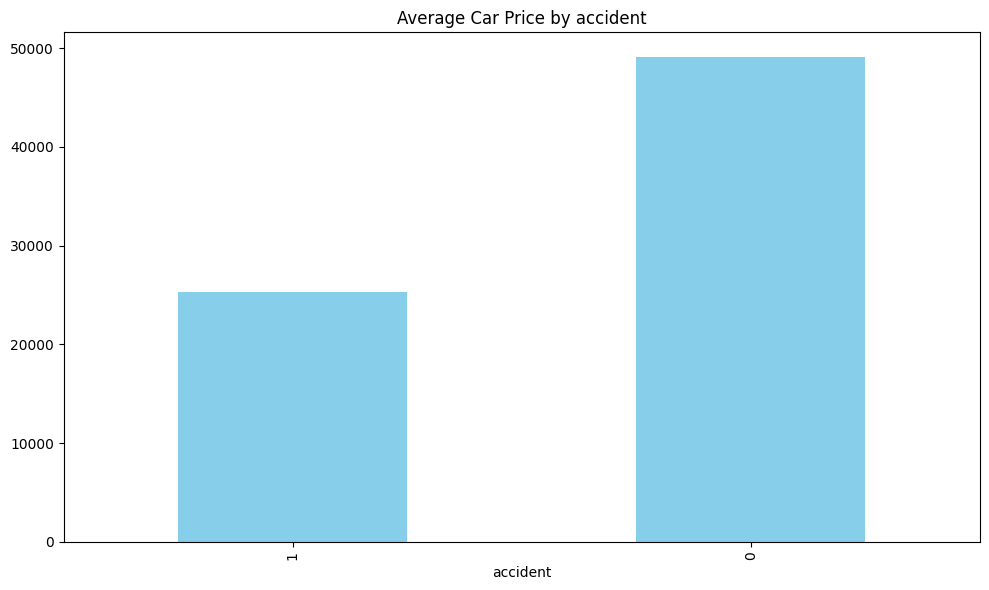

[1, 0]


In [ ]:
#brand
train['accident'] = train['accident'].round().astype(int)
te['accident'] = te['accident'].round().astype(int)


# Group by 'brand' and calculate the average price
accident_price = train.groupby('accident')['price'].mean().sort_values(ascending=True)

# Convert the result to a list of sorted brands
sorted_accident = accident_price.index.tolist()

# Visualization: Bar chart of average price by brand
plt.figure(figsize=(10, 6))
accident_price.plot(kind='bar', color='skyblue')
plt.title('Average Car Price by accident')
plt.xlabel('accident')
plt.xticks(rotation=90)  # Rotate brand names for better readability
plt.tight_layout()
plt.show()

# Print sorted brands list
print(sorted_accident)

#label this according to this list


COLORS HANDLING

In [ ]:

int_replacements = {
    'Medium Earth Gray': 'Gray',
    'Diesel Gray / Black': 'Gray',
    'Dark Ash': 'Gray',
    'Graphite': 'Gray',
    'Dark Galvanized': 'Charcoal',
    'Light Gray': 'Gray',
    'Ash': 'Gray',
    'Jet Black': 'Black',
    'Global Black': 'Black',
    'Black Onyx': 'Black',
    'Parchment.': 'Beige',
    'Sardar Brown': 'Brown',
    'Black/Gun Metal': 'Black',
    'Charcoal Black': 'Charcoal',
    'Ebony': 'Brown',
    'Ebony Black': 'Black',
    'Carbon Black': 'Black',
    'Obsidian Black': 'Black',
    'Black / Saddle Brown': 'Black',
    'Black/Saddle Brown': 'Black',
    'Black / Brown': 'Black',
    'Saddle Brown': 'Brown',
    'Sand Beige': 'Beige',    'Camel': 'Beige',
    'Parchment': 'Beige',
    'Macchiato Beige/Black': 'Beige',
    'Silk Beige/Espresso Brown': 'Beige',
    'Canberra Beige': 'Beige',
    'Macchiato': 'Beige',
    'Almond Beige': 'Beige',
    'Grace White': 'White',
    'Ivory / Ebony': 'White',
    'Bianco Polar': 'White',
    'White / Brown': 'White',
    'Platinum': 'White',
    'Cloud': 'Blue',
    'Rift Metallic': 'White',
    'Light Platinum / Jet Black': 'Silver',
    'Billet Clearcoat Metallic': 'Silver',
    'Sakhir Orange': 'Orange',
    'Pimento Red w/Ebony': 'Red',
    'Adrenaline Red': 'Red',
    'Rioja Red': 'Red',
    'Classic Red': 'Red',
    'Magma Red': 'Red',    'Cobalt Blue': 'Blue',
    'Tempest': 'Blue',
    'Stormy Sea': 'Blue',
    'Navy Pier': 'Blue',
    'Charles Blue': 'Blue',
    'Rhapsody Blue': 'Blue',
    'Kyalami Orange': 'Orange',
    'Sakhir Orange/Black': 'Orange',
    'Dark Gray': 'Gray',
    'Deep Garnet': 'Red',
    'Scarlet Ember': 'Red',
    'Beluga': 'Blue',
    'Chestnut': 'Brown',
    'Boulder': 'Gray',
    'Macchiato/Magmagrey': 'Beige',
    'Medium Stone': 'Gray',
    'BLACK': 'Black',
    'Portland': 'Gray',
    'Sandstone': 'Beige',
    'Slate': 'Gray',
    'Cappuccino': 'Brown',
    'Oyster W/Contrast': 'Beige',
    'Nero Ade': 'Black',
    'Light Titanium': 'Silver',    'Tan': 'Beige',
    'Brandy': 'Brown',
    'Amber': 'Yellow',
    'Hotspur': 'Blue',
    'Chateau': 'Green',
    'Ice': 'Blue',
    'Blk': 'Black',
    'Mesa': 'Brown',
    'Espresso': 'Brown',
    'Ceramic': 'White',
    'Medium Dark Slate': 'Gray',
    'Graphite w/Gun Metal': 'Gray',
    'Cocoa / Dune': 'Brown',
    'Roast': 'Brown',
    'Hotspur Hide': 'Brown',
    'ORANGE': 'Orange',
    'Walnut': 'Brown',
    'Caramel': 'Beige',
    'Giallo Taurus / Nero Ade': 'Yellow',
    'Medium Pewter': 'Gray',
    'Camel Leather': 'Brown',
    'Anthracite': 'Gray',
    'Mocha': 'Brown',   'Sahara Tan': 'Beige',
    'Porpoise': 'Beige',
    'Deep Cypress': 'Green',
    'Light Slate': 'Gray',
    'Beluga Hide': 'Black',
    'Tupelo': 'Green',
    'Gideon': 'Beige',
    'Medium Light Camel': 'Beige',
    'Nero': 'Black',
    'Deep Chestnut': 'Red',
    'Dark Auburn': 'Brown',
    'Shale': 'Gray',
    'BEIGE': 'Beige',
    'Linen': 'Beige',
    'WHITE': 'White'
}
ext_replacements = {
    'Blu': 'Blue',
    'BLUE': 'Blue',
    'Glacier': 'Blue',
    'BLU ELEOS': 'Blue',
    'Dark Sapphire': 'Navy',
    'Tangerine': 'Orange',
    'Pumpkin': 'Orange',
    'Clementine': 'Orange',
    'Granite': 'Gray',
    'Go Mango!': 'Yellow',
    'Onyx': 'Black',
    'Gecko Pearlcoat': 'Green',
    'Obsidian': 'Black',
    'Metallic': 'Silver',
    'Grigio Nimbus': 'Silver',
    'Chalk': 'White',
    'Bianco Monocerus': 'White',
    'Verde': 'Green',
    'Dark Graphite Metallic': 'Gray',
    'BLACK': 'Black',
    'Dark Moss': 'Green',
    'Granite Crystal Clearcoat Metallic': 'Gray',    'Ebony Twilight Metallic': 'Black',
    'Satin Steel Metallic': 'Silver',
    'Magnetic Metallic': 'Gray',
    'Dark Matter Metallic': 'Gray',
    'Dark Ash Metallic': 'Gray',
    'Iridium Metallic': 'Gray',
    'Nightfall Mica': 'Navy',
    'Sandstone Metallic': 'Beige',
    'Rift Metallic': 'White',
    'Billet Clearcoat Metallic': 'Silver',
    'Tan': 'Beige',
    'Ice': 'Blue',
    'Hellayella': 'Yellow',
    'Granite': 'Gray',
    'Yulong': 'White',
    'Blueprint': 'Navy',
    'Arancio Borealis': 'Orange',
    'Hellayella Clearcoat': 'Yellow',
    'Moonlight Cloud': 'Navy',
    'Liquid Platinum': 'Silver',
    'Gun Metallic': 'Gray',
    'Manhattan Noir Metallic': 'Gray',    'Lavender': 'Purple',
    'Violet': 'Purple',
    'Pink': 'Purple',
    'Mauve': 'Plum',
    'Tempest': 'Blue',
    'Nero Daytona': 'Black',
    'Scarlet Ember': 'Red',
    'Infrared Tintcoat': 'Red',
    'Maximum Steel Metallic': 'Gray',
    'Ember Pearlcoat': 'Brown',
    'Rich Garnet Metallic': 'Brown',
    'Tungsten Metallic': 'Gray',
    'Nero Noctis': 'Black',
    'Platinum Quartz Metallic': 'White',
    'Ruby Flare Pearl': 'Red',
    'Bianco Icarus Metallic': 'White',
    'Stormy Sea': 'Blue',
    'Mountain Air Metallic': 'Blue',
    'Wind Chill Pearl': 'White',
    'Iridescent Pearl Tricoat': 'White',
    'Black Cherry': 'Plum',
    'Black Forest Green': 'Green',
    'Maroon': 'Red',
    'Rosso': 'Red',    'Rosso Corsa': 'Red',
    'Rosso Mars Metallic': 'Red',
    'Quicksilver Metallic': 'Silver',
    'Designo Magno Matte': 'Gray',
    'Granite Crystal Metallic Clearcoat': 'Gray',
    'Bianco Isis': 'White',
    'Sunset Drift Chromaflair': 'Orange',
    'Ametrin Metallic': 'Plum',
    'GT SILVER': 'Silver',
    'Caviar': 'Black'
}


In [ ]:
#color column handling
print(train['int_col'].nunique())
print(train['ext_col'].nunique())


156
319


In [ ]:
train['int_col'] = train['int_col'].replace(int_replacements)

# For external color mapping
train['ext_col'] = train['ext_col'].replace(ext_replacements)

In [ ]:
base_colors = ['black', 'white', 'gray', 'silver', 'brown', 'red', 'blue', 'green',
     'beige', 'tan', 'orange', 'yellow', 'purple', 'plum', 'charcoal',
     'ivory', 'camel', 'chestnut', 'pearl', 'linen', 'graphite', 'copper',
     'slate', 'bronze', 'sand', 'amber', 'macchiato', 'ebony', 'cocoa', 'navy'
    ]


def find_base_color(text):
    for color in base_colors:
        if color in text:
            return color

train['int_col'] = train['int_col'].str.lower()
train['ext_col'] = train['ext_col'].str.lower()

te['int_col'] = te['int_col'].str.lower()
te['ext_col'] = te['ext_col'].str.lower()

train['int_col'] = train['int_col'].apply(find_base_color)
train['ext_col'] = train['ext_col'].apply(find_base_color)

te['int_col'] = te['int_col'].apply(find_base_color)
te['ext_col'] = te['ext_col'].apply(find_base_color)


In [ ]:
color_threshold = 50  # Threshold to decide frequent vs infrequent
# For internal color
value_counts_int_col = train['int_col'].value_counts()
freq_int_colors = value_counts_int_col[value_counts_int_col > color_threshold].index   #index is the color
train['int_col'] = train['int_col'].apply(lambda x: x if x in freq_int_colors else 'Other')

# For external color
value_counts_ext_col = train['ext_col'].value_counts()
freq_ext_colors = value_counts_ext_col[value_counts_ext_col > color_threshold].index   #index is the color
train['ext_col'] = train['ext_col'].apply(lambda x: x if x in freq_ext_colors else 'Other')

train['int_col'] = train['int_col'].replace('–', 'Other')
train['ext_col'] = train['ext_col'].replace('–', 'Other')

In [ ]:
te['int_col'] = te['int_col'].apply(lambda x: x if x in freq_int_colors else 'Other')
te['ext_col'] = te['ext_col'].apply(lambda x: x if x in freq_ext_colors else 'Other')
te['int_col'] = te['int_col'].replace('–' , 'Other')
te['ext_col'] = te['ext_col'].replace('–', 'Other')


In [ ]:
print(train['int_col'].nunique())
print(train['ext_col'].nunique())

15
16


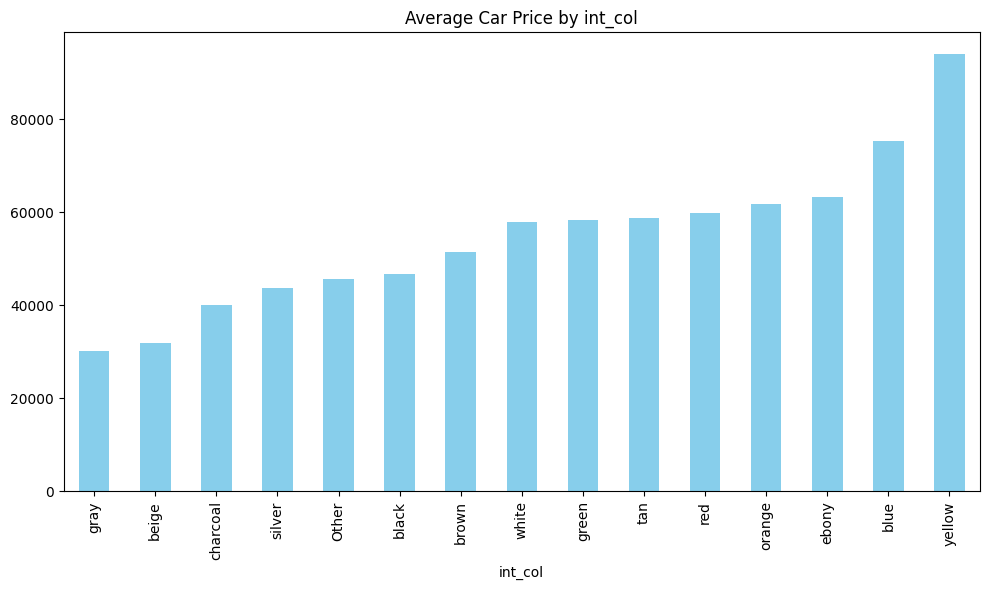

['gray', 'beige', 'charcoal', 'silver', 'Other', 'black', 'brown', 'white', 'green', 'tan', 'red', 'orange', 'ebony', 'blue', 'yellow']


In [ ]:
#brand

# Group by 'brand' and calculate the average price
int_col_price = train.groupby('int_col')['price'].mean().sort_values(ascending=True)

# Convert the result to a list of sorted brands
sorted_int_col = int_col_price.index.tolist()

# Visualization: Bar chart of average price by brand
plt.figure(figsize=(10, 6))
int_col_price.plot(kind='bar', color='skyblue')
plt.title('Average Car Price by int_col')
plt.xlabel('int_col')
plt.xticks(rotation=90)  # Rotate brand names for better readability
plt.tight_layout()
plt.show()

# Print sorted brands list
print(sorted_int_col)

#label this according to this list


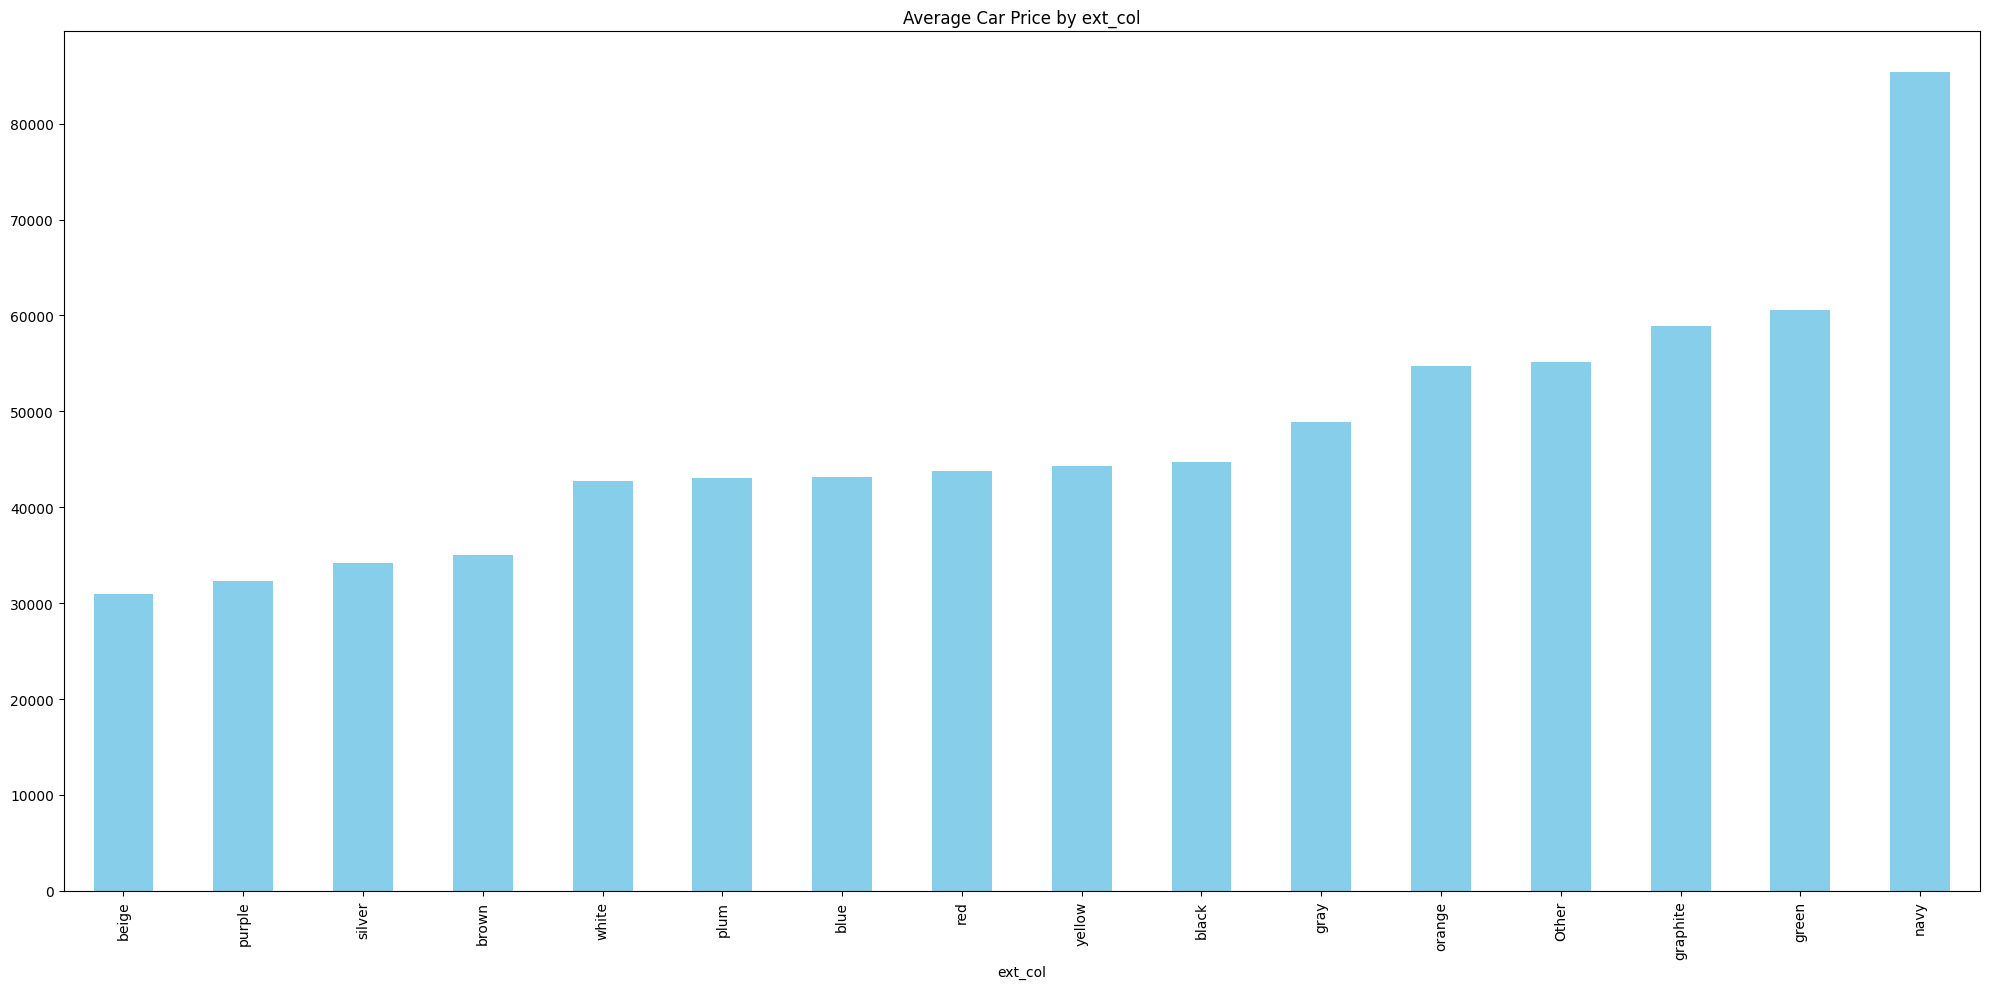

['beige', 'purple', 'silver', 'brown', 'white', 'plum', 'blue', 'red', 'yellow', 'black', 'gray', 'orange', 'Other', 'graphite', 'green', 'navy']


In [ ]:
#brand

# Group by 'brand' and calculate the average price
ext_col_price = train.groupby('ext_col')['price'].mean().sort_values(ascending=True)

# Convert the result to a list of sorted brands
sorted_ext_col = ext_col_price.index.tolist()

# Visualization: Bar chart of average price by brand
plt.figure(figsize=(20, 10))
ext_col_price.plot(kind='bar', color='skyblue')
plt.title('Average Car Price by ext_col')
plt.xlabel('ext_col')
plt.xticks(rotation=90)  # Rotate brand names for better readability
plt.tight_layout()
plt.show()

# Print sorted brands list
print(sorted_ext_col)

#label this according to this list


In [ ]:
int_to_index = {int_c: index for index, int_c in enumerate(sorted_int_col)}

# Replace brand names with their indices
train['int_col'] = train['int_col'].map(int_to_index)

In [ ]:
ext_to_index = {ext: index for index, ext in enumerate(sorted_ext_col)}

# Replace brand names with their indices
train['ext_col'] = train['ext_col'].map(ext_to_index)

In [ ]:
te['int_col'] = te['int_col'].map(int_to_index)
te['ext_col'] = te['ext_col'].map(ext_to_index)

In [ ]:
encoding()

NameError: name 'encoding' is not defined

BRAND HANDLING

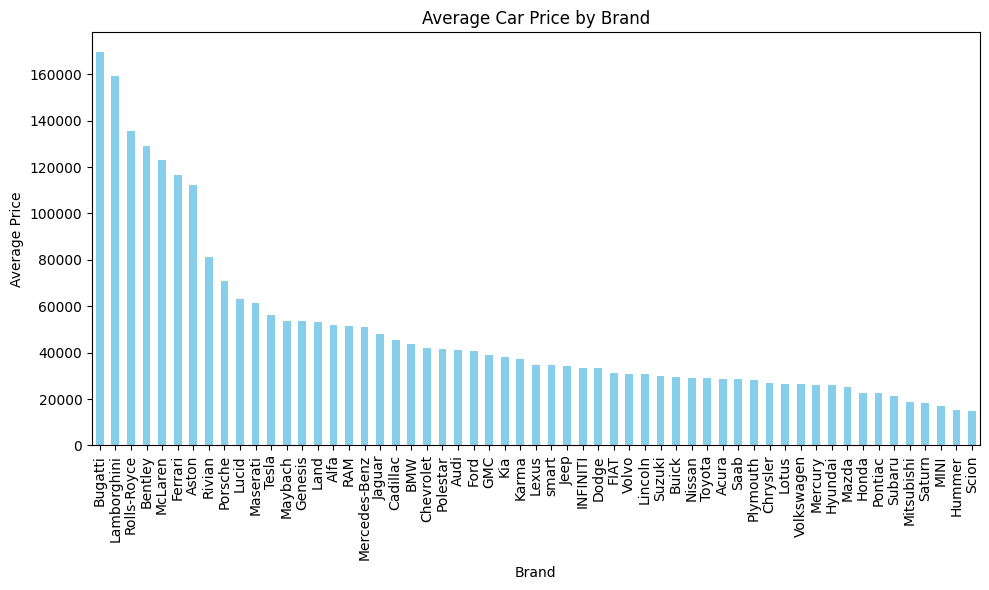

['Bugatti', 'Lamborghini', 'Rolls-Royce', 'Bentley', 'McLaren', 'Ferrari', 'Aston', 'Rivian', 'Porsche', 'Lucid', 'Maserati', 'Tesla', 'Maybach', 'Genesis', 'Land', 'Alfa', 'RAM', 'Mercedes-Benz', 'Jaguar', 'Cadillac', 'BMW', 'Chevrolet', 'Polestar', 'Audi', 'Ford', 'GMC', 'Kia', 'Karma', 'Lexus', 'smart', 'Jeep', 'INFINITI', 'Dodge', 'FIAT', 'Volvo', 'Lincoln', 'Suzuki', 'Buick', 'Nissan', 'Toyota', 'Acura', 'Saab', 'Plymouth', 'Chrysler', 'Lotus', 'Volkswagen', 'Mercury', 'Hyundai', 'Mazda', 'Honda', 'Pontiac', 'Subaru', 'Mitsubishi', 'Saturn', 'MINI', 'Hummer', 'Scion']


In [ ]:
#brand

# Group by 'brand' and calculate the average price
brand_price = train.groupby('brand')['price'].mean().sort_values(ascending=False)

# Convert the result to a list of sorted brands
sorted_brands = brand_price.index.tolist()

# Visualization: Bar chart of average price by brand
plt.figure(figsize=(10, 6))
brand_price.plot(kind='bar', color='skyblue')
plt.title('Average Car Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate brand names for better readability
plt.tight_layout()
plt.show()

# Print sorted brands list
print(sorted_brands)

#label this according to this list


In [ ]:
top_29_brands = sorted_brands[:29]
top_29_brands

['Bugatti',
 'Lamborghini',
 'Rolls-Royce',
 'Bentley',
 'McLaren',
 'Ferrari',
 'Aston',
 'Rivian',
 'Porsche',
 'Lucid',
 'Maserati',
 'Tesla',
 'Maybach',
 'Genesis',
 'Land',
 'Alfa',
 'RAM',
 'Mercedes-Benz',
 'Jaguar',
 'Cadillac',
 'BMW',
 'Chevrolet',
 'Polestar',
 'Audi',
 'Ford',
 'GMC',
 'Kia',
 'Karma',
 'Lexus']

In [ ]:
#replace the value with its index the list
# Create a mapping from brand to index
#brand_to_index = {brand: index for index, brand in enumerate(sorted_brands)}
# Replace brand names with their indices
#train['brand'] = train['brand'].map(brand_to_index)
#te['brand'] = te['brand'].map(brand_to_index)

train['brand'] = train['brand'].apply(lambda x: 1 if x in top_29_brands else 0)
te['brand'] = te['brand'].apply(lambda x: 1 if x in top_29_brands else 0)


MODEL YEAR HANDLING

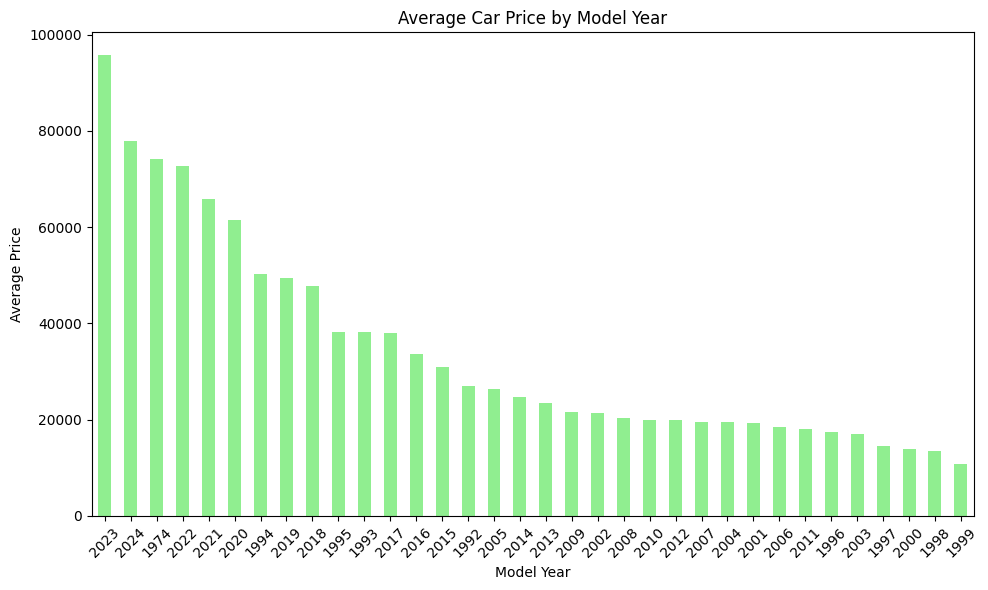

[2023, 2024, 1974, 2022, 2021, 2020, 1994, 2019, 2018, 1995, 1993, 2017, 2016, 2015, 1992, 2005, 2014, 2013, 2009, 2002, 2008, 2010, 2012, 2007, 2004, 2001, 2006, 2011, 1996, 2003, 1997, 2000, 1998, 1999]
34


In [ ]:
#year
# Group by 'model_year' and calculate the average price
year_price = train.groupby('model_year')['price'].mean().sort_values(ascending=False)

# Convert the result to a list of sorted years
sorted_years = year_price.index.tolist()

# Visualization: Bar chart of average price by model year
plt.figure(figsize=(10, 6))
year_price.plot(kind='bar', color='lightgreen')
plt.title('Average Car Price by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate year labels for better readability
plt.tight_layout()
plt.show()

# Print sorted years list
print(sorted_years)
print(len(sorted_years))

In [ ]:
# Remove all non-numeric characters except periods and commas not needed
#df['milage'] = df['milage'].replace(r'[^0-9.]', '', regex=True).astype(float)
# Convert from string currency format to numerical
"""df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['model_year'] = df['model_year'].astype(int)"""

"df['price'] = df['price'].replace({'\\$': '', ',': ''}, regex=True).astype(float)\ndf['model_year'] = df['model_year'].astype(int)"

In [ ]:
#model_year :  34  can be labeled
print("model_year : " ,df['model_year'].unique())

# Define the mapping for year batches
year_mapping = {
    (1996, 2000): 1,  # Older models
    (2001, 2010): 2,  # Early 2000s models
    (2011, 2014): 3,  # Mid-2000s models
    (1990, 1995): 4,  # old but high
    (2015, 2019): 4,  # Modern models
    (2020, 2024): 5,  # Newest models
    (1970, 1980): 5,  # Newest models
}

# Function to label encode the year
def label_encode_year(year):
    for year_range, label in year_mapping.items():
        if year_range[0] <= year <= year_range[1]:
            return label
    return None  # Default if year is out of range

# Apply the function to the 'model_year' column
train['model_year'] = train['model_year'].apply(label_encode_year)
te['model_year'] = te['model_year'].apply(label_encode_year)


model_year :  [2007 2002 2017 2021 2018 2016 2020 2015 2011 2013 2023 2019 2012 2014
 2008 2009 2022 2003 2005 2001 2006 2000 2010 2004 1997 1998 1999 1994
 1993 1996 1995 2024 1974 1992]


In [ ]:
train['model_year']

0         2
1         2
2         2
3         4
4         5
         ..
188528    4
188529    4
188530    5
188531    5
188532    4
Name: model_year, Length: 188533, dtype: int64

In [ ]:

#accident :  2  has null
#first fill nan with mode done
"""mode_acc = df['accident'].mode()

print(mode_acc)
df['accident'].fillna(df['accident'].mode()[0], inplace=True)
print("brand : " ,df['brand'].unique())

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'accident' column
df['accident'] = label_encoder.fit_transform(df['accident'])
#fuel_type :  7  has null
#brand :  57
print("brand : " ,df['brand'].unique())
print("model : " ,df['model'].unique())
print("accident : " ,df['accident'].value_counts())"""

'mode_acc = df[\'accident\'].mode()\n\nprint(mode_acc)\ndf[\'accident\'].fillna(df[\'accident\'].mode()[0], inplace=True)\nprint("brand : " ,df[\'brand\'].unique())\n\n# Initialize the LabelEncoder\nlabel_encoder = LabelEncoder()\n\n# Fit and transform the \'accident\' column\ndf[\'accident\'] = label_encoder.fit_transform(df[\'accident\'])\n#fuel_type :  7  has null\n#brand :  57\nprint("brand : " ,df[\'brand\'].unique())\nprint("model : " ,df[\'model\'].unique())\nprint("accident : " ,df[\'accident\'].value_counts())'

DROP DUPLICATES

In [ ]:
#drop duplicates
print(len(train[train.duplicated()]))
train = train.drop_duplicates()
print(train.duplicated().sum())


136
0


In [ ]:
te

,id,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,horsepower,engine_size,cylinders,Vehicle_Age
0,188533,1,4.0,98000,3,1,4,1,0,240.000000,2.0,4.0,9
1,188534,1,5.0,9142,5,1,2,5,0,395.000000,3.0,6.0,4
2,188535,1,5.0,28121,3,1,4,12,0,343.263856,3.5,6.0,2
3,188536,1,4.0,61258,3,1,8,5,0,343.263856,2.0,6.0,8
4,188537,1,4.0,59000,3,1,10,5,0,252.000000,2.0,4.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,1,3.0,83315,3,1,9,5,0,362.000000,3.0,6.0,10
125686,314219,1,4.0,29336,3,1,4,5,0,343.263856,3.0,6.0,5
125687,314220,1,3.0,77634,3,1,9,5,0,333.000000,3.0,6.0,12
125688,314221,1,3.0,112000,3,1,9,5,0,333.000000,3.0,6.0,12


SPLIT TRAIN DATA

In [ ]:
# Select the numerical columns to scale
from sklearn.model_selection import train_test_split

numeric_columns = ['brand', 'model_year', 'milage', 'fuel_type', 'transmission',
                   'ext_col', 'int_col', 'accident', 'horsepower', 'engine_size', 'cylinders',"Vehicle_Age"]

y_train1 = train['price']
x_train1 = train[numeric_columns]
X_train, X_test, y_train, y_test = train_test_split(x_train1, y_train1, test_size=0.2, random_state=8)


collrellation between features and target

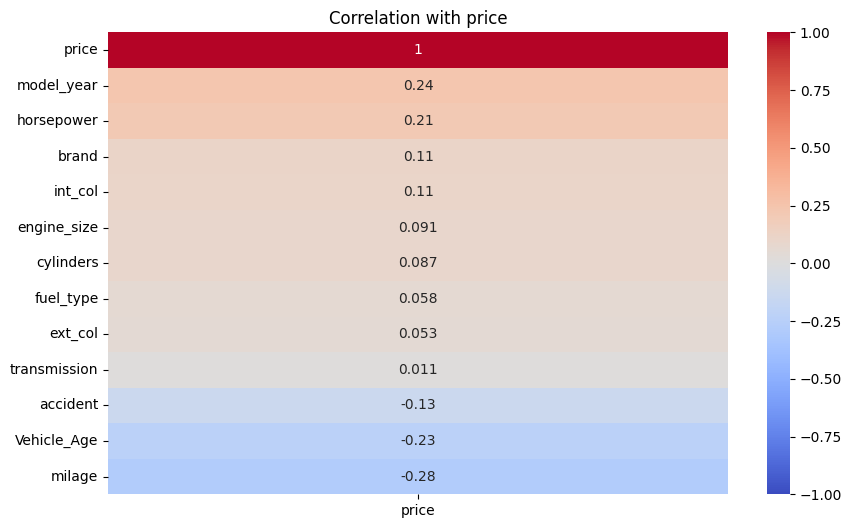

In [ ]:

def plot_correlation(df, target):

    df_numeric = df.select_dtypes(include=[int, float])

    # Compute correlation matrix
    corr = df_numeric.corr()

    # Extract correlations with the target variable
    target_corr = corr[['price']].sort_values(by='price', ascending=False)

    # Create a heatmap of correlations
    plt.figure(figsize=(10, 6))
    sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation with {"price"}')
    plt.show()

# Example usage
plot_correlation(train, 'price')


SCALING

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
brand,188397.0,0.751190,0.432324,0.00,1.0,1.000000,1.0,1.0
model_year,188397.0,3.813299,1.075952,1.00,3.0,4.000000,5.0,5.0
milage,188397.0,65712.053642,49799.194516,100.00,24115.0,57785.000000,95400.0,405000.0
fuel_type,188397.0,3.113632,0.718690,0.00,3.0,3.000000,3.0,6.0
transmission,188397.0,0.797109,0.402153,0.00,1.0,1.000000,1.0,1.0
ext_col,188397.0,6.789922,3.022650,0.00,4.0,7.000000,9.0,15.0
int_col,188397.0,4.151377,2.460320,0.00,1.0,5.000000,5.0,14.0
accident,188397.0,0.221612,0.415332,0.00,0.0,0.000000,0.0,1.0
price,188397.0,43876.313556,78839.236823,2000.00,17000.0,30798.000000,49900.0,2954083.0
horsepower,188397.0,343.264187,104.140238,70.00,280.0,343.263856,395.0,1020.0


In [ ]:
te

,id,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,horsepower,engine_size,cylinders,Vehicle_Age
0,188533,1,4.0,98000,3,1,4,1,0,240.000000,2.0,4.0,9
1,188534,1,5.0,9142,5,1,2,5,0,395.000000,3.0,6.0,4
2,188535,1,5.0,28121,3,1,4,12,0,343.263856,3.5,6.0,2
3,188536,1,4.0,61258,3,1,8,5,0,343.263856,2.0,6.0,8
4,188537,1,4.0,59000,3,1,10,5,0,252.000000,2.0,4.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,1,3.0,83315,3,1,9,5,0,362.000000,3.0,6.0,10
125686,314219,1,4.0,29336,3,1,4,5,0,343.263856,3.0,6.0,5
125687,314220,1,3.0,77634,3,1,9,5,0,333.000000,3.0,6.0,12
125688,314221,1,3.0,112000,3,1,9,5,0,333.000000,3.0,6.0,12


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ['brand', 'milage', 'fuel_type','int_col', 'accident', 'horsepower', 'engine_size', 'cylinders',"Vehicle_Age"]


numeric_test = [ 'milage','horsepower']


# Initialize the scaler
scaler = StandardScaler()
te_s = te.copy()
# Apply scaling
train_scaled = X_train.copy()
test_scaled = X_test.copy()

train_scaled = train_scaled[numeric_columns]
test_scaled  = test_scaled[numeric_columns]
te_s  = te_s[numeric_columns]

train_scaled[numeric_test] = scaler.fit_transform(X_train[numeric_test])
test_scaled[numeric_test] = scaler.transform(X_test[numeric_test])
te_s[numeric_test] = scaler.transform(te_s[numeric_test])



In [ ]:
train_scaled

,brand,milage,fuel_type,int_col,accident,horsepower,engine_size,cylinders,Vehicle_Age
138699,1,-0.585283,3,5,0,-0.001478,5.3,6.0,2
71509,1,-0.516135,3,5,0,0.830289,6.2,8.0,17
44232,0,-0.178181,3,0,0,-0.704050,4.0,6.0,14
142206,1,-0.867395,3,5,0,-0.128673,3.4,6.0,9
103465,1,-1.118517,3,5,0,0.964543,5.0,8.0,4
...,...,...,...,...,...,...,...,...,...
141506,1,-0.275270,3,0,0,0.657675,5.0,8.0,16
62442,1,0.595857,3,5,0,2.661905,6.0,12.0,9
149561,1,-0.265234,3,5,0,-0.080725,3.0,6.0,5
25944,1,1.039450,3,0,0,-0.704050,3.5,6.0,14


In [ ]:
test_scaled

,brand,milage,fuel_type,int_col,accident,horsepower,engine_size,cylinders,Vehicle_Age
187758,0,0.607900,3,5,1,-0.368413,2.5,4.0,8
149752,0,-0.164874,3,5,0,-1.663011,1.8,4.0,5
134444,1,-0.215054,3,5,0,-0.032777,3.0,6.0,7
120762,1,-0.013952,3,6,0,-0.608154,3.0,6.0,8
47820,1,0.607900,3,5,1,-0.320465,3.0,6.0,11
...,...,...,...,...,...,...,...,...,...
159660,1,-1.211872,3,5,0,-0.032777,3.0,6.0,1
125601,0,2.093232,3,0,1,0.446704,5.7,8.0,13
90597,1,0.070070,4,7,0,-0.001478,6.7,6.0,4
134343,1,-0.656639,3,5,0,-0.001478,3.5,6.0,3


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
min_max_scaler = MinMaxScaler()

# Apply scaling
train_minmax_scaled = X_train.copy()
test_minmax_scaled = X_test.copy()
te_smin = te.copy()


train_minmax_scaled = train_minmax_scaled[numeric_columns]
test_minmax_scaled  = test_minmax_scaled[numeric_columns]
te_smin  = te_smin[numeric_columns]

train_minmax_scaled[numeric_test] = min_max_scaler.fit_transform(X_train[numeric_test])
test_minmax_scaled[numeric_test] = min_max_scaler.transform(X_test[numeric_test])
te_smin[numeric_test] = min_max_scaler.transform(te_smin[numeric_test])

# Check the transformed data
print(train_minmax_scaled[numeric_test].describe())
print(test_minmax_scaled[numeric_test].describe())

              milage     horsepower
count  150717.000000  150717.000000
mean        0.162050       0.287808
std         0.123044       0.109768
min         0.000000       0.000000
25%         0.059311       0.221053
50%         0.142504       0.287646
75%         0.235367       0.342105
max         1.000000       1.000000
             milage    horsepower
count  37680.000000  37680.000000
mean       0.162025      0.286999
std        0.122780      0.109031
min        0.000000      0.006316
25%        0.059553      0.221053
50%        0.141721      0.287646
75%        0.235431      0.342105
max        1.000000      1.000000


In [ ]:
y_test

187758    18500
149752    28500
134444    29000
120762    38500
47820     15000
          ...  
159660    67900
125601    10500
90597     35670
134343    69790
28135     18749
Name: price, Length: 37680, dtype: int64

In [ ]:
# Initialize the StandardScaler
y_scaler = StandardScaler()

# Reshape the target variable if it's a single feature
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Fit and transform the target variable
y_train_scaled = y_scaler.fit_transform(y_train_reshaped)
y_test_scaled = y_scaler.transform(y_test_reshaped)

y_train_scaled

array([[-0.10925111],
       [-0.34474849],
       [-0.40513896],
       ...,
       [-0.13063569],
       [ 0.02712964],
       [-0.21444494]])

In [ ]:
y_train_original = y_scaler.inverse_transform(y_test_scaled)
y_train_original

array([[ 34999.],
       [ 14950.],
       [ 35000.],
       ...,
       [128000.],
       [ 26000.],
       [ 29995.]])

In [ ]:
import xgboost as xgb
from lightgbm import LGBMRegressor

In [ ]:
lgb_params = {
    'learning_rate': 0.017521301504983752,
    'max_depth': 42,
    'reg_alpha': 0.06876635751774487,
    'reg_lambda': 9.738899198284985,
    'num_leaves': 131,
    'subsample': 0.2683765421728044,
    'colsample_bytree': 0.44346036599709887,
    'n_estimators': 1000,
    'random_state': 42
}

model_1 = LGBMRegressor(**lgb_params)
model_1.fit(train_minmax_scaled, y_train)

LGBMRegressor(colsample_bytree=0.44346036599709887,
              learning_rate=0.017521301504983752, max_depth=42,
              n_estimators=1000, num_leaves=131, random_state=42,
              reg_alpha=0.06876635751774487, reg_lambda=9.738899198284985,
              subsample=0.2683765421728044)

In [ ]:
xgb_params = {
    'learning_rate': 0.05,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.5,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'n_estimators': 200,
    'seed': 42
}
model_2 = xgb.XGBRegressor(**xgb_params)
model_2.fit(train_minmax_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xgb_params_3 = {
    'colsample_bytree': 0.49938653455911297,
    'learning_rate': 0.01763,
    'max_bin': 2249,
    'n_estimators': 5000,
    'n_jobs': -1,
    'random_state': 42,
    'reg_alpha': 0.416272935775317,
    'reg_lambda': 86.59005784540076,
    'subsample': 0.7495711298182588,
}

model_3 = xgb.XGBRegressor(**xgb_params_3)
model_3.fit(train_minmax_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.49938653455911297, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01763, max_bin=2249,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=5000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
predictions1 = model_1.predict(test_minmax_scaled)
predictions1

array([20805.82009004, 27149.58026495, 34995.64535748, ...,
       83925.55832188, 53697.45778756, 28366.69285822])

In [ ]:
predictions2 = model_2.predict(test_minmax_scaled)
predictions2

array([18923.74 , 27153.555, 36402.12 , ..., 71082.37 , 56297.766,
       28761.71 ], dtype=float32)

In [ ]:
predictions3 = model_3.predict(test_minmax_scaled)
predictions3

array([20419.648, 27193.926, 35964.984, ..., 55027.934, 54208.594,
       25101.959], dtype=float32)

In [ ]:
y_pred_lgb = model_1.predict(test_minmax_scaled)
y_pred_xgb = model_2.predict(test_minmax_scaled)
y_pred_cat = model_3.predict(test_minmax_scaled)

In [ ]:
#validation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Calculate evaluation metrics for each model on the test set
models = [model_1, model_2, model_3]
predictions = [y_pred_lgb, y_pred_xgb, y_pred_cat]
model_names = ['LGBMRegressor', 'XGBRegressor', 'XGBRegressor with xgb_params_3']

for model, y_pred, name in zip(models, predictions, model_names):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Metrics for {name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}")
    print("")

Metrics for LGBMRegressor:
Mean Squared Error: 5833142837.540685
Mean Absolute Error: 19998.42455051527
Root Mean Squared Error: 76375.0144847167
R-squared: 0.12495570528878963

Metrics for XGBRegressor:
Mean Squared Error: 5787436279.044315
Mean Absolute Error: 19753.04597534698
Root Mean Squared Error: 76075.20147225582
R-squared: 0.1318122600410121

Metrics for XGBRegressor with xgb_params_3:
Mean Squared Error: 5802600209.578278
Mean Absolute Error: 19881.501361576007
Root Mean Squared Error: 76174.8003579811
R-squared: 0.12953748102930274



In [ ]:
ids = te['id']


In [ ]:
y_pred_lgbt = model_1.predict(te_s)
y_pred_xgbt = model_2.predict(te_s)
y_pred_catt = model_3.predict(te_s)

In [ ]:
y_pred_catt

array([11983.004, 86854.37 , 43493.473, ..., 11961.338,  8377.976,
       26389.1  ], dtype=float32)

In [ ]:
#test
tpredictions = [y_pred_lgbt, y_pred_xgbt, y_pred_catt]

for model, y_pred, name in zip(models, tpredictions, model_names):

    print(f"Metrics for test:")
    print(f"Metrics for {name}:")
    print(f"Mean Squared Error: {y_pred}")
    print("")

Metrics for test:
Metrics for LGBMRegressor:
Mean Squared Error: [19829.00868588 98482.35298947 51252.30622441 ... 22263.96539091
 17286.94368253 30935.59208004]

Metrics for test:
Metrics for XGBRegressor:
Mean Squared Error: [19015.89  77543.77  51879.625 ... 26766.592 20812.932 34821.777]

Metrics for test:
Metrics for XGBRegressor with xgb_params_3:
Mean Squared Error: [19599.238 84741.7   53931.426 ... 23670.576 18404.832 33351.684]



In [ ]:
y_tpred_lgb = model_1.predict(train_minmax_scaled)
y_tpred_xgb = model_2.predict(train_minmax_scaled)
y_tpred_cat = model_3.predict(train_minmax_scaled)

In [ ]:

# Calculate evaluation metrics for each model on the test set
models = [model_1, model_2, model_3]
predictions = [y_tpred_lgb, y_tpred_xgb, y_tpred_cat]
model_names = ['LGBMRegressor', 'XGBRegressor', 'XGBRegressor with xgb_params_3']

for model, y_pred, name in zip(models, predictions, model_names):
    mse = mean_squared_error(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, y_pred)

    print(f"Metrics for {name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}")
    print("")

Metrics for LGBMRegressor:
Mean Squared Error: 4431779027.77582
Mean Absolute Error: 18758.813036869436
Root Mean Squared Error: 66571.60827091246
R-squared: 0.2738311621289319

Metrics for XGBRegressor:
Mean Squared Error: 4918880590.513743
Mean Absolute Error: 19401.21207257888
Root Mean Squared Error: 70134.73169916417
R-squared: 0.19401717015828535

Metrics for XGBRegressor with xgb_params_3:
Mean Squared Error: 4672949056.749462
Mean Absolute Error: 18912.25678562047
Root Mean Squared Error: 68358.97202817975
R-squared: 0.23431426415827328



In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb
from lightgbm import LGBMRegressor

# List of regression models
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'XGBRegressor': xgb.XGBRegressor(),
    'LGBMRegressor': LGBMRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
}

# Hyperparameters for each model (you can modify based on the requirement)
param_grid = {
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.1, 0.5, 1.0]},
    'ElasticNet': {'alpha': [0.1, 0.5, 1.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    'DecisionTreeRegressor': {'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 10, 20]},
    'XGBRegressor': {
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 500, 1000],
        'max_depth': [3, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.5, 0.8, 1.0],
    },
    'LGBMRegressor': {
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 500, 1000],
        'max_depth': [5, 10, 20, None],
        'num_leaves': [31, 50, 100],
    },
    'AdaBoostRegressor': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    'SVR': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'poly', 'rbf'], 'epsilon': [0.1, 0.2, 0.5]},
}

# Store results
best_models = {}
results = {}

# Iterate over models
for name, model in models.items():
    print(f"Training {name}...")

    # Use RandomizedSearchCV for faster search
    search = RandomizedSearchCV(estimator=model, param_distributions=param_grid[name],
                                n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)

    search.fit(train_scaled, y_train)

    # Get best model and parameters
    best_model = search.best_estimator_
    best_params = search.best_params_

    # Evaluate on test set
    y_pred = best_model.predict(test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store best model and results
    best_models[name] = best_model
    results[name] = {
        'best_params': best_params,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
    }

    # Print the results
    print(f"{name} Best Params: {best_params}")
    print(f"{name} MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}\n")

# Compare models
for name, result in results.items():
    print(f"{name} -> MSE: {result['mse']:.4f}, RMSE: {result['rmse']:.4f}, MAE: {result['mae']:.4f}, R^2: {result['r2']:.4f}")

# Get the best model based on RMSE or any metric you prefer
best_model_name = min(results, key=lambda k: results[k]['rmse'])
best_model = best_models[best_model_name]
print(f"The best model is {best_model_name} with RMSE: {results[best_model_name]['rmse']:.4f}")


Training Ridge...
Ridge Best Params: {'alpha': 10.0}
Ridge MSE: 6080103882.0117, RMSE: 77975.0209, MAE: 23298.2520, R^2: 0.0879

Training Lasso...
Lasso Best Params: {'alpha': 0.5}
Lasso MSE: 6080103097.3012, RMSE: 77975.0159, MAE: 23298.3092, R^2: 0.0879

Training ElasticNet...
ElasticNet Best Params: {'l1_ratio': 0.9, 'alpha': 0.1}
ElasticNet MSE: 6080527836.2950, RMSE: 77977.7394, MAE: 23253.4585, R^2: 0.0878

Training DecisionTreeRegressor...
DecisionTreeRegressor Best Params: {'min_samples_split': 20, 'max_depth': 5}
DecisionTreeRegressor MSE: 5888174373.5181, RMSE: 76734.4406, MAE: 20734.8195, R^2: 0.1167

Training XGBRegressor...
XGBRegressor Best Params: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
XGBRegressor MSE: 5778038991.7892, RMSE: 76013.4132, MAE: 19859.3502, R^2: 0.1332

Training LGBMRegressor...
LGBMRegressor Best Params: {'num_leaves': 31, 'n_estimators': 500, 'max_depth': None, 'learning_rate': 0.01}
LGBMReg

KeyboardInterrupt: 

In [ ]:
#Compare models
for name, result in results.items():
    print(f"{name} -> MSE: {result['mse']:.4f}, RMSE: {result['rmse']:.4f}, MAE: {result['mae']:.4f}, R^2: {result['r2']:.4f}")

# Get the best model based on RMSE or any metric you prefer
best_model_name = min(results, key=lambda k: results[k]['rmse'])
best_model = best_models[best_model_name]
print(f"The best model is {best_model_name} with RMSE: {results[best_model_name]['rmse']:.4f}")


Ridge -> MSE: 6080103882.0117, RMSE: 77975.0209, MAE: 23298.2520, R^2: 0.0879
Lasso -> MSE: 6080103097.3012, RMSE: 77975.0159, MAE: 23298.3092, R^2: 0.0879
ElasticNet -> MSE: 6080527836.2950, RMSE: 77977.7394, MAE: 23253.4585, R^2: 0.0878
DecisionTreeRegressor -> MSE: 5888174373.5181, RMSE: 76734.4406, MAE: 20734.8195, R^2: 0.1167
XGBRegressor -> MSE: 5778038991.7892, RMSE: 76013.4132, MAE: 19859.3502, R^2: 0.1332
LGBMRegressor -> MSE: 5789278309.4191, RMSE: 76087.3072, MAE: 19732.8721, R^2: 0.1315
AdaBoostRegressor -> MSE: 5996742010.0916, RMSE: 77438.6338, MAE: 21804.9168, R^2: 0.1004
The best model is XGBRegressor with RMSE: 76013.4132


In [ ]:
y_bpred_cat = best_model.predict(te_s)

TEST DATA

In [ ]:

# Combine predictions and ids into a DataFrame
submission_df = pd.DataFrame({
    'id': ids,                         # 'ids' refers to the column extracted from te_s
    'catt_class': y_bpred_cat          # CatBoost predictions
})

# Optionally, if the predictions need to be inverse transformed (e.g., scaling)
# submission_df['lgbt_class'] = y_scaler.inverse_transform(y_pred_lgbt)
# submission_df['xgbt_class'] = y_scaler.inverse_transform(y_pred_xgbt)
# submission_df['catt_class'] = y_scaler.inverse_transform(y_pred_catt)

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_predictions2.csv', index=False)

# Print confirmation
print("Submission file created: submission_predictions2.csv")


Submission file created: submission_predictions2.csv
